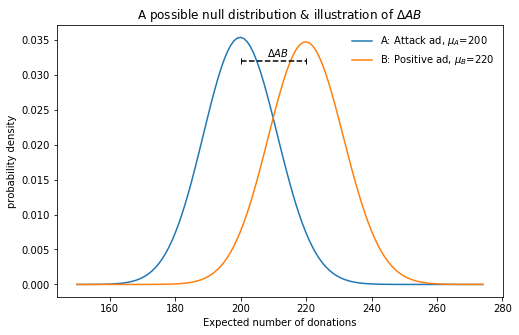

In [65]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(8)
n = 550
pA, pB = 220./n, 200./n

x = np.arange(150, 275)

ax.plot(x, binom.pmf(x, n, pB), label='A: Attack ad, $\mu_A$=200')
ax.plot(x, binom.pmf(x, n, pA), label='B: Positive ad, $\mu_B$=220')

ax.plot([200, 220], [0.032, 0.032], 'k', linestyle='--', marker='|')
ax.text(208, 0.0325, '$\Delta AB$')


ax.set_ylabel('probability density')
ax.set_xlabel('Expected number of donations')
ax.set_title('A possible null distribution & illustration of $\Delta AB$')

ax.legend(loc='best', frameon=False)
plt.savefig('AB_binomial_model.png')
plt.show()


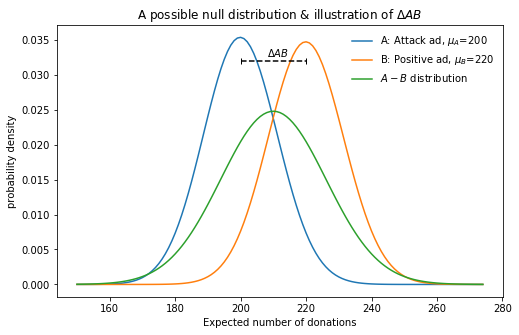

In [99]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(8)
n = 550
pA, pB = 220./n, 200./n

x = np.arange(150, 275)

def sigma_approx(n, pA, pB):
    return np.sqrt(n * pA * (1 - pA) + n * pB * (1 - pB))

ax.plot(x, binom.pmf(x, n, pB), label='A: Attack ad, $\mu_A$=200')
ax.plot(x, binom.pmf(x, n, pA), label='B: Positive ad, $\mu_B$=220')
ax.plot(x, norm.pdf(x, loc=n * (pA + pB)/2, scale=sigma_approx(n, pA, pB)),
       label='$A-B$ distribution')

ax.plot([200, 220], [0.032, 0.032], 'k', linestyle='--', marker='|')
ax.text(208, 0.0325, '$\Delta AB$')


ax.set_ylabel('probability density')
ax.set_xlabel('Expected number of donations')
ax.set_title('A possible null distribution & illustration of $\Delta AB$')

ax.legend(loc='best', frameon=False)
#plt.savefig('AB_binomial_model.png')
plt.show()

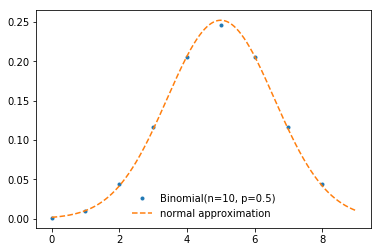

In [80]:
import numpy as np
from scipy.stats import binom, norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
figsize = (10, 10)
n, p = 10, 0.5



def sigma_approx(n, p):
    return np.sqrt(n * p * (1 - p))

# ppf means 'point percent function' and tells you what the x-location of the 
# distribution is where 0.99, say, fraction of area under the function is to the 
# left of x. 
x_max = binom.ppf(0.99, n, p)
x_norm = np.linspace(0, x_max, 1000)
x_binom = np.arange(0, x_max)

# binom has a 'pmf' (probability *mass* function) because it's discrete.
ax.plot(x_binom, binom.pmf(x_binom, n, p), '.', 
        label='Binomial(n={}, p={})'.format(n, p))

# norm has a 'pdf' (probability *density* function) because it's continuous. 
ax.plot(x_norm, norm.pdf(x_norm, loc=p*n, scale=sigma_approx(n, p)), 
        linestyle='--', label='normal approximation')


ax.legend(loc='best', frameon=False)
plt.show()

In [158]:
import numpy as np
from scipy.stats import norm
from scipy.stats import ttest_ind_from_stats


nA, nB = 550., 600.
kA, kB = 200., 220. 
pA, pB = kA/nA, kB/nB
sigma = nA * pA * (1 - pA) + nB * pB * (1 - pB) 
t = (kB - kA)/(sigma/np.sqrt(nA + nB))
print(np.sqrt(sigma))
print(sigma)
print(t)
print(norm.cdf(t, loc=0, scale=1))

x = ttest_ind_from_stats(mean1=kA,
                     std1 = nA * pA * (1 - pA),
                     nobs1=nA,
                     mean2=kB,
                     std2 = nB * pB * (1 - pB),
                     nobs2=nB,
                     equal_var=False)

print(x[0], x[1])

print(2 * norm.cdf(x[0], loc=0, scale=1))

16.328075839058947
266.606060606
2.543951914561649
0.9945196913954913
(-2.5439479702061485, 0.011090932629853606)
0.010960740977016858


In [219]:
from scipy.stats import t

nA, nB = 550., 550.
kA, kB = 200., 220.
sigmaA = nA * pA * (1 - pA)
sigmaB = nB * pB * (1 - pB) 
pooled_variance = (((nA - 1)*(sigmaA**2) + \
                    (nB - 1)*(sigmaB**2))/(nA + nB - 2))*(1/nA + 1/nB) 
t_test_stat = (kA - kB)/np.sqrt(pooled_variance)
print(t_test_stat)
print( t.cdf(t_test_stat, nA + nB - 1 ))

-2.601321825411256
0.0047056514907018124


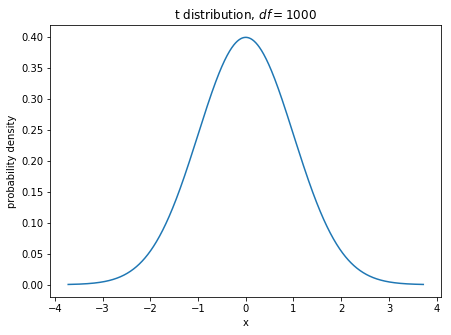

In [290]:
import numpy as np
from scipy.stats import binom, norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(7)

x_max = norm.ppf(0.9999)
x_norm = np.linspace(-x_max, x_max, 1000)

#ax.plot(x_norm, norm.pdf(x_norm, loc=0, scale=1), 
#        linestyle='-', color='k')

ax.plot(x_norm, t.pdf(x_norm, df=1000))

ax.set_ylabel('probability density')
ax.set_xlabel('x')
ax.set_title('t distribution, $df=1000$')
plt.savefig('AB_t_distribution.png')

plt.show()

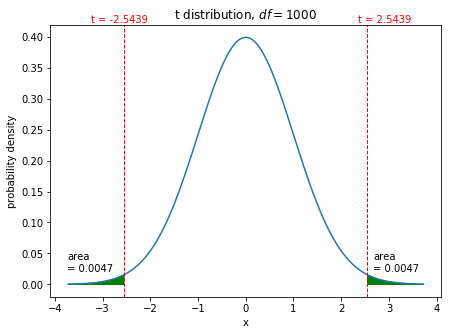

In [289]:
import numpy as np
from scipy.stats import binom, norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(7)

t_val = 2.5439
p_val = 0.0047

x_max = norm.ppf(0.9999)
x_norm = np.linspace(-x_max, x_max, 1000)

ax.plot(x_norm, t.pdf(x_norm, df=1000))
ax.fill_between(x_norm, t.pdf(x_norm, df=1000), where=np.abs(x_norm) > t_val, 
                color='g')

ax.set_ylabel('probability density')
ax.set_xlabel('x')
ax.set_title('t distribution, $df=1000$')
ax.text(t_val * 1.05, t.pdf(t_val, df=1000) * 1.3, 
        'area\n= ' + str(p_val), size=10)
ax.text(-t_val * 1 - 1.2, t.pdf(-t_val, df=1000) * 1.3, 
        'area\n= ' + str(p_val), size=10)
ax.axvline(t_val, 0, 1, linewidth=1,
          linestyle='--', color='r')
ax.axvline(-t_val, 0, 1, linewidth=1,
          linestyle='--', color='r')
ax.text(t_val - 0.2, ax.get_ylim()[1] * 1.01, "t = " + str(t_val), color='r')
ax.text(-t_val - 0.7, ax.get_ylim()[1] * 1.01, "t = " + str(-t_val), color='r')

plt.savefig('AB_t_p_value.png')

plt.show()

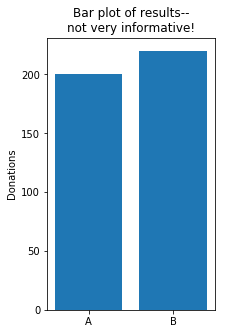

In [305]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(3)

ax.bar(['A', 'B'], [200, 220])
ax.set_ylabel('Donations')
ax.set_title('Bar plot of results--\nnot very informative!')
plt.savefig('AB_barplot.png')
plt.show()